In [1]:
# More compact notebook about BSC
import sys, os
sys.path.insert(0,"/home/zhi/SULI21")
import quasim as qua
import numpy as np
import pandas as pd
from scipy import optimize

In [2]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [3]:
QT = qua.QuaTel()
# Process the BSC to array of stars
# Output as [[star_num1,RA1,DEC1,S1],[star_num2,RA2,DEC2,S2],....] 
# in rad and Jy, S is in V-band
BSC = qua.BSC_process("/home/zhi/SULI21/bsc5.dat")

In [4]:
# Let wavelength of observation be 0.55 mircometer
lam = 0.55*10**(-6)

#NEW YORK COORD but the overall baseline is E-W, with B ~ 270m
pos_t_NY = [[-1.3,0.71,6.4*10**(6)],[-1.30004,0.71,6.4*10**(6)]]

# filter stars and give pair of stars
pos = BSC.BSC_filter(pos_t_NY)

# Period of Observation
T = 40000.0   # about 12 hours

print(pos)

[[[1.14500000e+03 9.82656730e-01 4.27033587e-01 6.93587701e+01]
  [1.14200000e+03 9.81202289e-01 4.20857060e-01 1.20531728e+02]]

 [[1.14900000e+03 9.85354718e-01 4.25297954e-01 1.03062669e+02]
  [1.14200000e+03 9.81202289e-01 4.20857060e-01 1.20531728e+02]]

 [[1.15600000e+03 9.87536380e-01 4.17977267e-01 7.74642613e+01]
  [1.14200000e+03 9.81202289e-01 4.20857060e-01 1.20531728e+02]]

 [[1.14900000e+03 9.85354718e-01 4.25297954e-01 1.03062669e+02]
  [1.14500000e+03 9.82656730e-01 4.27033587e-01 6.93587701e+01]]

 [[1.15600000e+03 9.87536380e-01 4.17977267e-01 7.74642613e+01]
  [1.14900000e+03 9.85354718e-01 4.25297954e-01 1.03062669e+02]]

 [[1.16500000e+03 9.92590562e-01 4.20711616e-01 2.58881719e+02]
  [1.14900000e+03 9.85354718e-01 4.25297954e-01 1.03062669e+02]]

 [[1.16500000e+03 9.92590562e-01 4.20711616e-01 2.58881719e+02]
  [1.15600000e+03 9.87536380e-01 4.17977267e-01 7.74642613e+01]]

 [[1.17800000e+03 9.99906401e-01 4.19809863e-01 1.28558674e+02]
  [1.16500000e+03 9.925905

In [ ]:
# Find pair rate of each pair separately due to memory issues.

In [6]:
num_0, t_0, baseline, excess_0 = QT.get_num_photon(pos[0],pos_t_NY,lam,T,'pos')

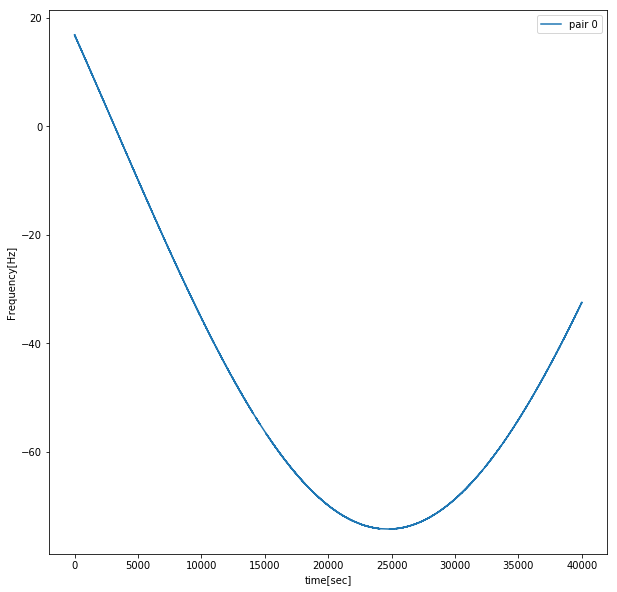

In [6]:
#
w_t_0, new_t_0 = QT.freq_func(num_0,t_0,excess_0)
freq_0 = np.amax(np.absolute(w_t_0[0]))

t = np.arange(40000)
N = new_t_0.size-1

plt.figure(figsize=(10,10))
plt.plot(new_t_0,w_t_0[0],label= 'pair 0')
plt.xlabel('time[sec]');plt.ylabel('Frequency[Hz]')
plt.legend()


In [8]:

freq_0 = np.amax(np.absolute(w_t_0[0]))
freq_0

74.27406291978886

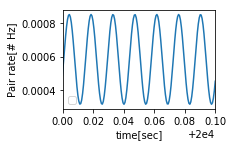

In [7]:
plt.subplot(2,2,4)
plt.plot(t_0,num_0[0])
plt.xlim([20000,20000.1])
plt.xlabel('time[sec]');plt.ylabel('Pair rate[# Hz]')
plt.legend()

In [7]:
max_res_rate = np.amax(num_0, axis=1)
min_res_rate = np.amin(num_0, axis=1)
avg_res_rate = (max_res_rate + min_res_rate)/2
avg_res_rate

array([0.0005835])

In [5]:
# Do the same for pair #1
num_1, t_1, baseline, excess_1 = QT.get_num_photon(pos[1],pos_t_NY,lam,T,'pos')
w_t_1, new_t_1 = QT.freq_func(num_1,t_1,excess_1)
freq_1 = np.amax(np.absolute(w_t_1[0]))
avg_res_rate_1 = (np.amax(num_1,axis=1) + np.amin(num_1,axis=1))/2
print("max freq:", freq_1, "avg_res_rate:", avg_res_rate_1)

('max freq:', 114.67722038676007, 'avg_res_rate:', array([0.00080901]))


In [5]:
# Do the same for pair #2
num_2, t_2, baseline, excess_2 = QT.get_num_photon(pos[2],pos_t_NY,lam,T,'pos')
w_t_2, new_t_2 = QT.freq_func(num_2,t_2,excess_2)
freq_2 = np.amax(np.absolute(w_t_2[0]))
avg_res_rate_2 = (np.amax(num_2,axis=1) + np.amin(num_2,axis=1))/2

print("max freq:", freq_2, "avg_res_rate:", avg_res_rate_2)

('max freq:', 156.50479719187896, 'avg_res_rate:', array([0.00063437]))


In [5]:
# Do the same for pair #3
num_3, t_3, baseline, excess_3 = QT.get_num_photon(pos[3],pos_t_NY,lam,T,'pos')
w_t_3, new_t_3 = QT.freq_func(num_3,t_3,excess_3)
freq_3 = np.amax(np.absolute(w_t_3[0]))
avg_res_rate_3 = (np.amax(num_3,axis=1) + np.amin(num_3,axis=1))/2

print("max freq:", freq_3, "avg_res_rate:", avg_res_rate_3)

('max freq:', 66.2372559705449, 'avg_res_rate:', array([0.00048108]))


In [5]:
# Do the same for pair #4
num_4, t_4, baseline, excess_4 = QT.get_num_photon(pos[4],pos_t_NY,lam,T,'pos')
w_t_4, new_t_4 = QT.freq_func(num_4,t_4,excess_4)
freq_4 = np.amax(np.absolute(w_t_4[0]))
avg_res_rate_4 = (np.amax(num_4,axis=1) + np.amin(num_4,axis=1))/2

print("max freq:", freq_4, "avg_res_rate:", avg_res_rate_4)

('max freq:', 93.59697256383915, 'avg_res_rate:', array([0.00052737]))


In [5]:
# Do the same for pair #5
num_5, t_5, baseline, excess_5 = QT.get_num_photon(pos[5],pos_t_NY,lam,T,'pos')
w_t_5, new_t_5 = QT.freq_func(num_5,t_5,excess_5)
freq_5 = np.amax(np.absolute(w_t_5[0]))
avg_res_rate_5 = (np.amax(num_5,axis=1) + np.amin(num_5,axis=1))/2

print("max freq:", freq_5, "avg_res_rate:", avg_res_rate_5)

('max freq:', 183.88036482603323, 'avg_res_rate:', array([0.0021199]))


In [5]:
# Do the same for pair #6
num_6, t_6, baseline, excess_6 = QT.get_num_photon(pos[6],pos_t_NY,lam,T,'pos')
w_t_6, new_t_6 = QT.freq_func(num_6,t_6,excess_6)
freq_6 = np.amax(np.absolute(w_t_6[0]))
avg_res_rate_6 = (np.amax(num_6,axis=1) + np.amin(num_6,axis=1))/2

print("max freq:", freq_6, "avg_res_rate:", avg_res_rate_6)

('max freq:', 124.5769699828788, 'avg_res_rate:', array([0.00183064]))


In [5]:
# Do the same for pair #7
num_7, t_7, baseline, excess_7 = QT.get_num_photon(pos[7],pos_t_NY,lam,T,'pos')
w_t_7, new_t_7 = QT.freq_func(num_7,t_7,excess_7)
freq_7 = np.amax(np.absolute(w_t_7[0]))
avg_res_rate_7 = (np.amax(num_7,axis=1) + np.amin(num_7,axis=1))/2

print("max freq:", freq_7, "avg_res_rate:", avg_res_rate_7)

('max freq:', 178.9021160400992, 'avg_res_rate:', array([0.00242907]))


In [5]:
# Do the same for pair #8
num_8, t_8, baseline, excess_8 = QT.get_num_photon(pos[8],pos_t_NY,lam,T,'pos')
w_t_8, new_t_8 = QT.freq_func(num_8,t_8,excess_8)
freq_8 = np.amax(np.absolute(w_t_8[0]))
avg_res_rate_8 = (np.amax(num_8,axis=1) + np.amin(num_8,axis=1))/2

print("max freq:", freq_8, "avg_res_rate:", avg_res_rate_8)

('max freq:', 135.37886314676103, 'avg_res_rate:', array([0.00034168]))


In [5]:
# Do the same for pair #9
num_9, t_9, baseline, excess_9 = QT.get_num_photon(pos[9],pos_t_NY,lam,T,'pos')
w_t_9, new_t_9 = QT.freq_func(num_9,t_9,excess_9)
freq_9 = np.amax(np.absolute(w_t_9[0]))
avg_res_rate_9 = (np.amax(num_9,axis=1) + np.amin(num_9,axis=1))/2

print("max freq:", freq_9, "avg_res_rate:", avg_res_rate_9)

('max freq:', 14.645826084284781, 'avg_res_rate:', array([0.00113502]))


In [5]:
# Do the same for pair #10
num_10, t_10, baseline, excess_10 = QT.get_num_photon(pos[10],pos_t_NY,lam,T,'pos')
w_t_10, new_t_10 = QT.freq_func(num_10,t_10,excess_10)
freq_10 = np.amax(np.absolute(w_t_10[0]))
avg_res_rate_10 = (np.amax(num_10,axis=1) + np.amin(num_10,axis=1))/2

print("max freq:", freq_10, "avg_res_rate:", avg_res_rate_10)

('max freq:', 212.80748754103158, 'avg_res_rate:', array([0.00036717]))


In [5]:
# Do the same for pair #11
num_11, t_11, baseline, excess_11 = QT.get_num_photon(pos[11],pos_t_NY,lam,T,'pos')
w_t_11, new_t_11 = QT.freq_func(num_11,t_11,excess_11)
freq_11 = np.amax(np.absolute(w_t_11[0]))
avg_res_rate_11 = (np.amax(num_11,axis=1) + np.amin(num_11,axis=1))/2

print("max freq:", freq_11, "avg_res_rate:", avg_res_rate_11)

('max freq:', 150.42128879747443, 'avg_res_rate:', array([0.00080528]))


In [5]:
# Do the same for pair #12
num_12, t_12, baseline, excess_12 = QT.get_num_photon(pos[12],pos_t_NY,lam,T,'pos')
w_t_12, new_t_12 = QT.freq_func(num_12,t_12,excess_12)
freq_12 = np.amax(np.absolute(w_t_12[0]))
avg_res_rate_12 = (np.amax(num_12,axis=1) + np.amin(num_12,axis=1))/2

print("max freq:", freq_12, "avg_res_rate:", avg_res_rate_12)

('max freq:', 0.06597229602086595, 'avg_res_rate:', array([0.01153067]))


In [5]:
# Do the same for pair #13
num_13, t_13, baseline, excess_13 = QT.get_num_photon(pos[13],pos_t_NY,lam,T,'pos')
w_t_13, new_t_13 = QT.freq_func(num_13,t_13,excess_13)
freq_13 = np.amax(np.absolute(w_t_13[0]))
avg_res_rate_13 = (np.amax(num_13,axis=1) + np.amin(num_13,axis=1))/2

print("max freq:", freq_13, "avg_res_rate:", avg_res_rate_13)

('max freq:', 199.47448995493096, 'avg_res_rate:', array([0.00104459]))


In [8]:
# Do the same for pair #14
num_14, t_14, baseline, excess_14 = QT.get_num_photon(pos[14],pos_t_NY,lam,T,'pos')
w_t_14, new_t_14 = QT.freq_func(num_14,t_14,excess_14)
freq_14 = np.amax(np.absolute(w_t_14[0]))
avg_res_rate_14 = (np.amax(num_14,axis=1) + np.amin(num_14,axis=1))/2

print("max freq:", freq_14, "avg_res_rate:", avg_res_rate_14)

('max freq:', 0.5549194075566124, 'avg_res_rate:', array([0.00311654]))


In [5]:
# Do the same for pair #15
num_15, t_15, baseline, excess_15 = QT.get_num_photon(pos[15],pos_t_NY,lam,T,'pos')
w_t_15, new_t_15 = QT.freq_func(num_15,t_15,excess_15)
freq_15 = np.amax(np.absolute(w_t_15[0]))
avg_res_rate_15 = (np.amax(num_15,axis=1) + np.amin(num_15,axis=1))/2

print("max freq:", freq_15, "avg_res_rate:", avg_res_rate_15)

('max freq:', 1.6432006899459564, 'avg_res_rate:', array([0.0048175]))


In [5]:
# Do the same for pair #16
num_16, t_16, baseline, excess_16 = QT.get_num_photon(pos[16],pos_t_NY,lam,T,'pos')
w_t_16, new_t_16 = QT.freq_func(num_16,t_16,excess_16)
freq_16 = np.amax(np.absolute(w_t_16[0]))
avg_res_rate_16 = (np.amax(num_16,axis=1) + np.amin(num_16,axis=1))/2

print("max freq:", freq_16, "avg_res_rate:", avg_res_rate_16)

('max freq:', 87.79233032102418, 'avg_res_rate:', array([0.00472704]))


In [5]:
# Do the same for pair #17
num_17, t_17, baseline, excess_17 = QT.get_num_photon(pos[17],pos_t_NY,lam,T,'pos')
w_t_17, new_t_17 = QT.freq_func(num_17,t_17,excess_17)
freq_17 = np.amax(np.absolute(w_t_17[0]))
avg_res_rate_17 = (np.amax(num_17,axis=1) + np.amin(num_17,axis=1))/2

print("max freq:", freq_17, "avg_res_rate:", avg_res_rate_17)

('max freq:', 87.21327261027281, 'avg_res_rate:', array([0.00056186]))


In [8]:
max_freq = np.array([74.274, 114.677, 156.505, 66.237, 93.597, 183.880, 124.577,
                     178.902, 135.379, 14.646, 212.807, 150.421, 0.066, 199.474,
                     0.555, 1.643, 87.792, 87.213])
avg_pair_rate = np.array([0.0005835, 0.00080901, 0.00063437, 0.00048108, 0.00052737,
                          0.0021199, 0.00183064, 0.00242907, 0.00034168, 0.00113502,
                          0.00036717, 0.00080528, 0.01153067, 0.00104459, 0.00311654, 
                          0.0048175, 0.00472704, 0.00056186])


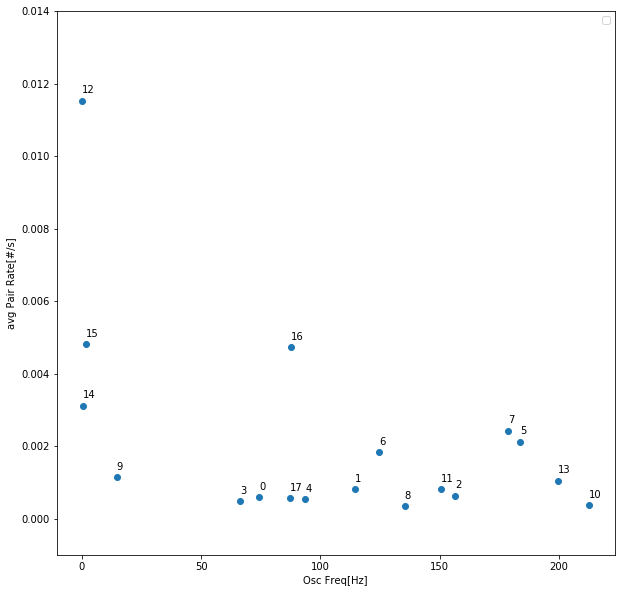

In [19]:
n = np.arange(0,18)
plt.figure(figsize=(10,10))
plt.ylim([-0.001,0.014])
plt.scatter(max_freq, avg_pair_rate)

for i, label in enumerate(n):
    plt.annotate(label, (max_freq[i],avg_pair_rate[i]+0.0002), size=10)
    
plt.xlabel("Osc Freq[Hz]");plt.ylabel("avg Pair Rate[#/s]")
plt.legend()
plt.show()

In [32]:
# average flux density of the pairs:
avg_flux_den = np.mean(pos, axis=1)[:,3]

# Separation in DEC and RA of pairs
DEC_diff = abs(np.diff(pos,axis=1))[:,:,2]
RA_diff = abs(np.diff(pos,axis=1))[:,:,1]

<IPython.core.display.Javascript object>


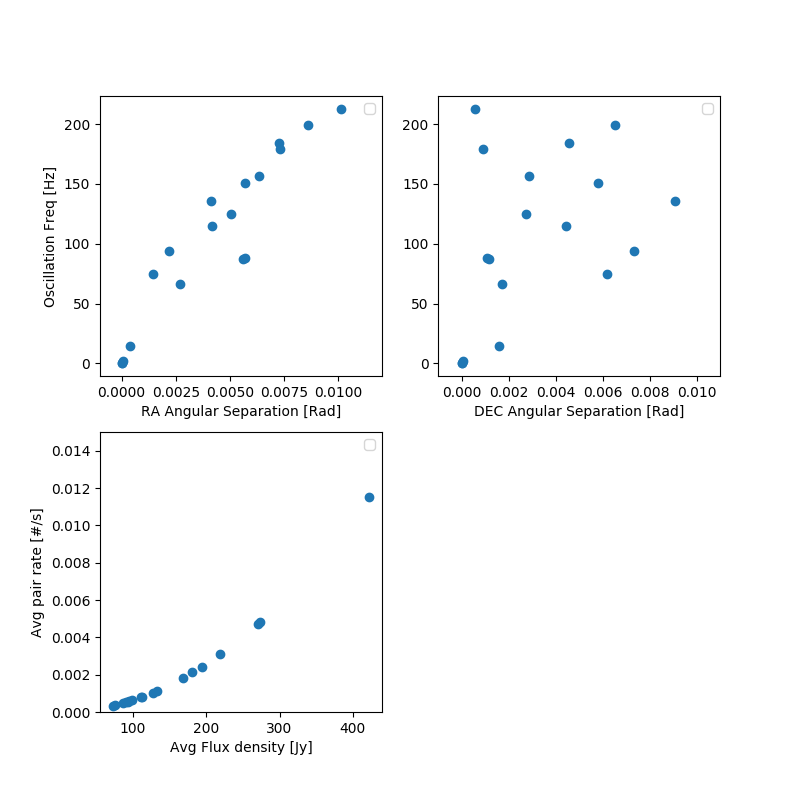

In [201]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.xlim([-0.001,0.012])
plt.scatter(RA_diff, max_freq )
plt.xlabel('RA Angular Separation [Rad]');plt.ylabel('Oscillation Freq [Hz]')
plt.legend()
plt.subplot(2,2,2)
plt.xlim([-0.001,0.011])
plt.scatter(DEC_diff, max_freq)
plt.xlabel('DEC Angular Separation [Rad]')
plt.legend()
plt.subplot(2,2,3)
plt.ylim([0,0.015])
plt.scatter(avg_flux_den, avg_pair_rate)
plt.xlabel('Avg Flux density [Jy]');plt.ylabel('Avg pair rate [#/s]')
plt.legend()

In [44]:
%matplotlib notebook

<IPython.core.display.Javascript object>


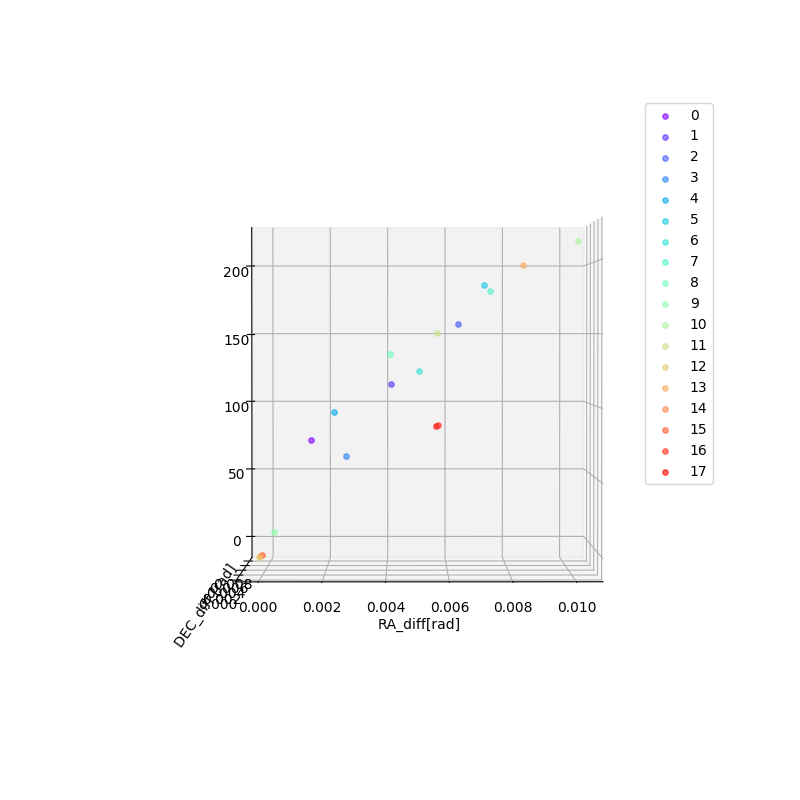

In [49]:
L = len(DEC_diff)
colors = cm.rainbow(np.linspace(0,1,L))
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection = '3d')

for i in range(L):
    ax.scatter(RA_diff[i],DEC_diff[i],max_freq[i],alpha = 0.6, color=colors[i],s=15,label=i)
plt.xlabel('RA_diff[rad]');plt.ylabel('DEC_diff [rad]')
plt.legend()
plt.show()

In [73]:
a = np.array([[6,2,4],[2,6,7]])
cond = np.where(a[:,1] > 3)


array([2, 6])

In [200]:
pos_t = np.array(pos_t_NY)

        
        #Select out stars that are never in the plane of tele, diff in DEC less than some deg
cond1 = np.where((np.absolute(BSC.pos_s[:,2] - pos_t[0,1]) < np.pi/6.) &
                         (np.absolute(BSC.pos_s[:,2] - pos_t[1,1]) < np.pi/6.))

pos_s = BSC.pos_s[cond1]
cond2 = np.where(pos_s[:,3] > 50.0)
pos_s = pos_s[cond2]
print(pos_s[210])


delay = ((9 - 3.0)*30*np.pi/180)
cond_pos = np.where((pos_s[:,1] - delay> np.pi) & (pos_s[:,1]-delay < 5*np.pi/4))
print(pos_s[cond_pos].shape)
cond_neg = np.where((pos_s[:,1]-delay > -np.pi) & (pos_s[:,1]-delay < -3*np.pi/4))
print(pos_s[cond_neg].shape)

pos_s = np.vstack((pos_s[cond_neg],pos_s[cond_pos]))
print(pos_s.shape)

[5.32900000e+03 3.72402357e+00 9.03910868e-01 5.56034045e+01]
(0, 4)
(45, 4)
(45, 4)


In [199]:
pos_t = np.array(pos_t_NY)

        
        #Select out stars that are never in the plane of tele, diff in DEC less than some deg
cond1 = np.where((np.absolute(BSC.pos_s[:,2] - pos_t[0,1]) < np.pi/6.) &
                         (np.absolute(BSC.pos_s[:,2] - pos_t[1,1]) < np.pi/6.))

pos_s = BSC.pos_s[cond1]
cond2 = np.where(pos_s[:,3] > 50.0)
pos_s = pos_s[cond2]
print(pos_s[210])

delay = ((9 - 3.0)*30*np.pi/180)
cond_pos = np.where(( np.mod(pos_s[:,1]-delay,2*np.pi)> np.pi) & (np.mod(pos_s[:,1]-delay,2*np.pi) < 5*np.pi/4))
print(pos_s[210])

pos_s = pos_s[cond_pos]
#pos_s = np.vstack((pos_s_check[cond_lo],pos_s_check[cond_hi]))
print(pos_s.shape)

[5.32900000e+03 3.72402357e+00 9.03910868e-01 5.56034045e+01]
[5.32900000e+03 3.72402357e+00 9.03910868e-01 5.56034045e+01]
(45, 4)
